## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv("../data/Telecom-Churn.csv") 

print(data.shape) 
print(data.columns)

(7043, 22)
Index(['Unnamed: 0', 'CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [3]:
data = data.drop(columns=['CustomerID', 'Unnamed: 0'])

In [4]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [5]:
# Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7017.000000,7032.000000
mean,0.162147,32.371149,64.707482,2283.300441
std,0.368612,24.559481,30.105503,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,401.450000
50%,0.000000,29.000000,70.300000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


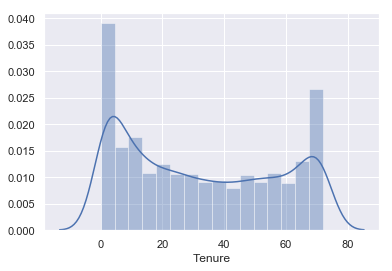

In [6]:
g = sns.distplot(data['Tenure'])

C:\Users\Lucia\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Lucia\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


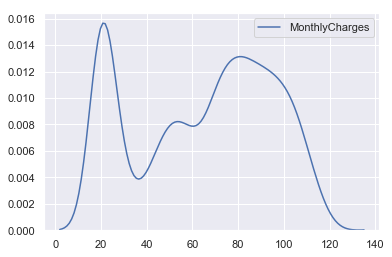

In [7]:
g = sns.kdeplot(data["MonthlyCharges"])

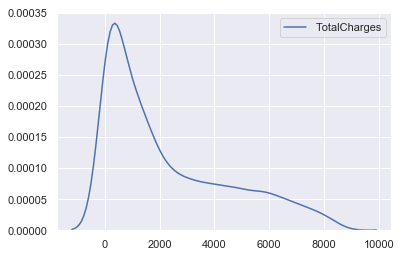

In [8]:
g = sns.kdeplot(data["TotalCharges"])

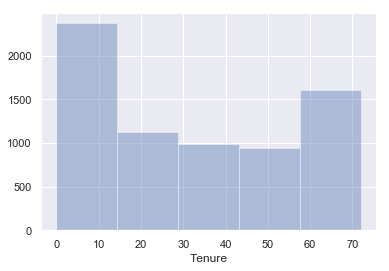

In [9]:
g = sns.distplot(data['Tenure'],kde=False,bins=5) 

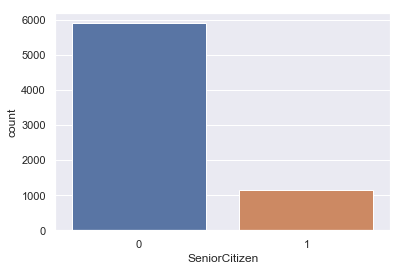

In [10]:
g = sns.countplot(data['SeniorCitizen'])

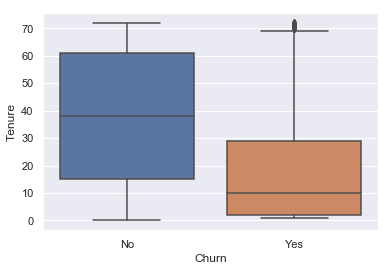

In [11]:
g = sns.boxplot(x="Churn", y="Tenure", data=data)

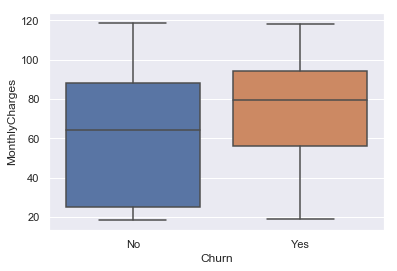

In [12]:
g = sns.boxplot(x="Churn", y="MonthlyCharges", data=data)

In [13]:
# Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
data['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [14]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [15]:
data['Dependents'].value_counts()

No     4921
Yes    2102
Name: Dependents, dtype: int64

In [16]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [17]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [18]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
data['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [20]:
data['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [21]:
data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [22]:
data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [23]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [24]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [25]:
data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [26]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [27]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

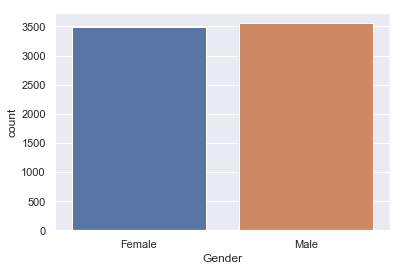

In [28]:
g = sns.countplot(x="Gender", data=data)

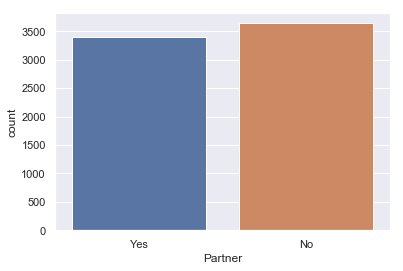

In [29]:
g = sns.countplot(x="Partner", data=data)

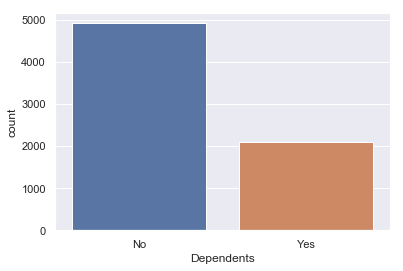

In [30]:
g = sns.countplot(x="Dependents", data=data)

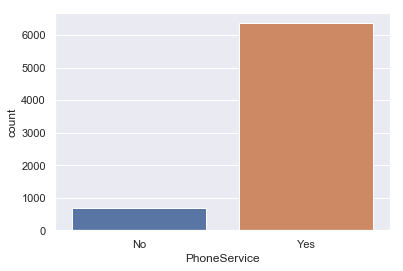

In [31]:
g = sns.countplot(x="PhoneService", data=data)

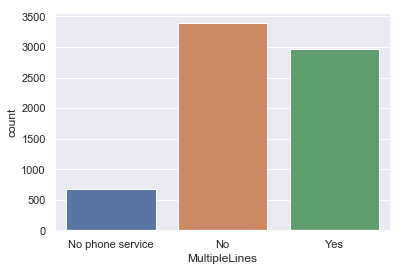

In [32]:
g = sns.countplot(x="MultipleLines", data=data)

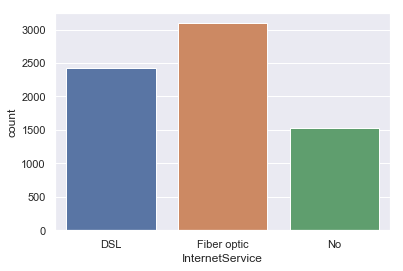

In [33]:
g = sns.countplot(x="InternetService", data=data)

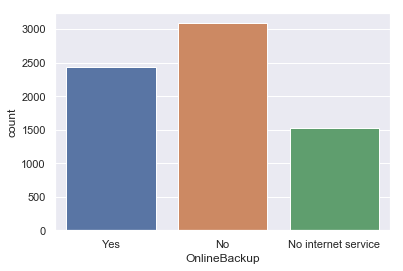

In [34]:
g = sns.countplot(x="OnlineBackup", data=data)

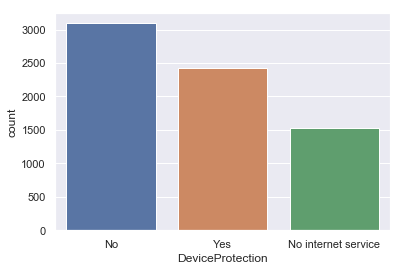

In [35]:
g = sns.countplot(x="DeviceProtection", data=data)

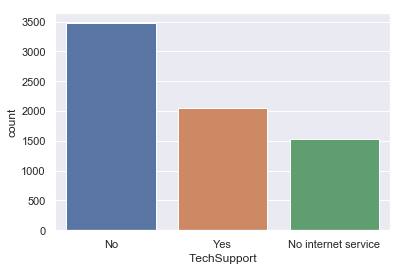

In [36]:
g = sns.countplot(x="TechSupport", data=data)

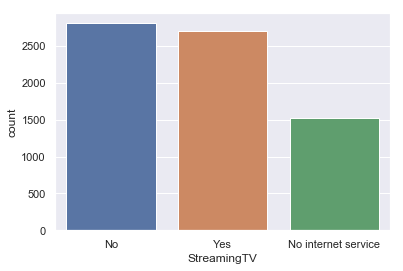

In [37]:
g = sns.countplot(x="StreamingTV", data=data)

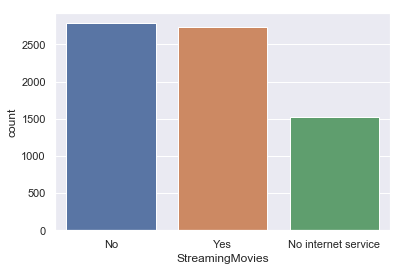

In [38]:
g = sns.countplot(x="StreamingMovies", data=data)

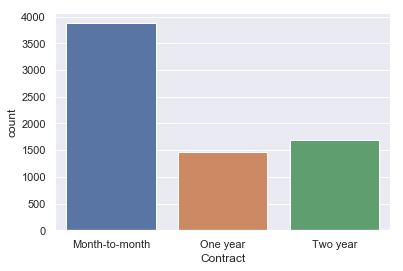

In [39]:
g = sns.countplot(x="Contract", data=data)

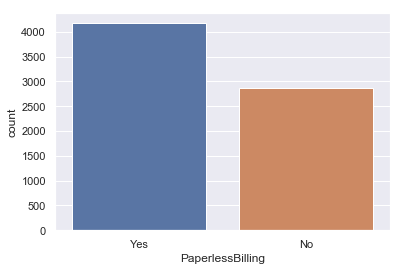

In [40]:
g = sns.countplot(x="PaperlessBilling", data=data)

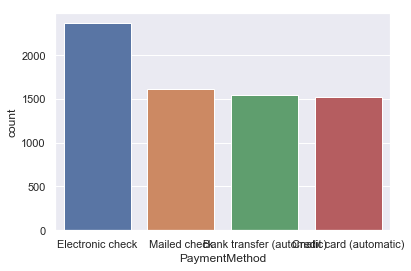

In [41]:
g = sns.countplot(x="PaymentMethod", data=data)

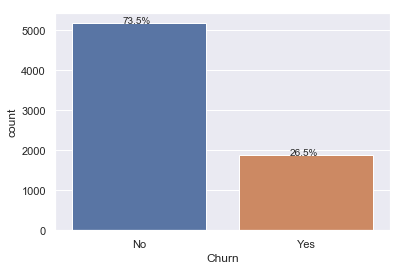

In [42]:
ax=sns.countplot(x="Churn",data=data)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format( (p.get_height()/data.shape[0])*100 ), (p.get_x()+0.3, p.get_height()))   

In [43]:
# Pre každý atribút vypočítajte počet chýbajúcich hodnôt.
data.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [44]:
# najviac su korelovane : TotalCharges a Tenure
corr_table = data.corr()
corr_table

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.219811,0.102411
Tenure,0.016567,1.000000,0.247732,0.825880
MonthlyCharges,0.219811,0.247732,1.000000,0.651316
TotalCharges,0.102411,0.825880,0.651316,1.000000


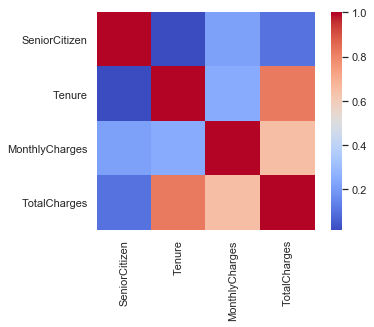

In [45]:
p = sns.heatmap(data.corr(),
                cmap='coolwarm', 
                square=True) 

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [46]:
# Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
data["MonthlyCharges"].describe()

count    7017.000000
mean       64.707482
std        30.105503
min        18.250000
25%        35.400000
50%        70.300000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [47]:
data["MonthlyCharges_1"] = pd.cut(data["MonthlyCharges"], 5 , labels=['less_1', 'much_1', 'avg_avg_MCH', 'more_1', 'more than much_1'])
data["MonthlyCharges_1"].value_counts()

more_1              1817
less_1              1797
avg_avg_MCH         1361
more than much_1    1042
much_1              1000
Name: MonthlyCharges_1, dtype: int64

In [48]:
data["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [49]:
data["TotalCharges_1"] = pd.cut(data["TotalCharges"], 5, labels=['less' , 'much', 'avg_avg_TCH', 'more', 'more than much'])
data["TotalCharges_1"].value_counts() 

less              3937
much              1179
avg_avg_TCH        866
more               705
more than much     345
Name: TotalCharges_1, dtype: int64

In [50]:
# Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.
data["Tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

In [51]:
data["Tenure_1"] = pd.qcut(data["Tenure"], 5, labels=['short' , 'short1', 'avg', 'long', 'long1'])
data["Tenure_1"].value_counts()

short     1481
avg       1408
long1     1407
short1    1397
long      1350
Name: Tenure_1, dtype: int64

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [52]:
data["MonthlyCharges_1"] = data["MonthlyCharges_1"].map({'less_1':0, 'more_1':1, 'avg_avg_MCH':2, 'much_1':3, 'more than much_1':4})

In [53]:
data["TotalCharges_1"] = data["TotalCharges_1"].map({'less':0 , 'more':1, 'avg_avg_TCH':2, 'much':3, 'more than much':4})

In [54]:
data["Tenure_1"] = data["Tenure_1"].map({'short':0 , 'short1':1, 'avg':2, 'long':3, 'long1':4})

In [55]:
# Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). 
# Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
data['Churn'] = data['Churn'].map({"No":0, "Yes":1})

In [56]:
f = pd.pivot_table(data, index=['MonthlyCharges_1', 'TotalCharges_1'], values=['Churn'], columns=['Tenure_1'])
f

Churn                                \
Tenure_1                                0         1         2         3   
MonthlyCharges_1 TotalCharges_1                                           
0.0              0.0             0.307522  0.105000  0.037143  0.033557   
                 3.0                  NaN       NaN       NaN  0.000000   
1.0              0.0             0.744337  0.571839  0.300000       NaN   
                 1.0                  NaN       NaN       NaN  0.204082   
                 2.0                  NaN       NaN  0.285714  0.184669   
                 3.0                  NaN  0.565217  0.352332  0.166667   
                 4.0                  NaN       NaN       NaN       NaN   
2.0              0.0             0.649275  0.315113  0.217391       NaN   
                 1.0                  NaN       NaN       NaN       NaN   
                 2.0                  NaN       NaN       NaN  0.060870   
                 3.0                  NaN       NaN  0.188482  0.134921   
3.0              0.0             0.496970  0.237668  0.143750  0.000000   
                 2.0                  NaN       NaN       NaN       NaN   
                 3.0                  NaN       NaN  0.162791  0.120805   
4.0              0.0             0.833333  0.728571       NaN       NaN   
                 1.0                  NaN       NaN       NaN  0.282353   
                 2.0                  NaN       NaN  0.362319  0.346457   
                 3.0                  NaN  0.533333  0.467290       NaN   
                 4.0                  NaN       NaN       NaN  0.000000   

                                           
Tenure_1                                4  
MonthlyCharges_1 TotalCharges_1            
0.0              0.0             0.004566  
                 3.0             0.000000  
1.0              0.0                  NaN  
                 1.0             0.057402  
                 2.0             0.032258  
                 3.0                  NaN  
                 4.0             0.000000  
2.0              0.0                  NaN  
                 1.0             0.032258  
                 2.0             0.023392  
                 3.0                  NaN  
3.0              0.0                  NaN  
                 2.0             0.047619  
                 3.0             0.040816  
4.0              0.0                  NaN  
                 1.0             0.216667  
                 2.0                  NaN  
                 3.0                  NaN  
                 4.0             0.111111

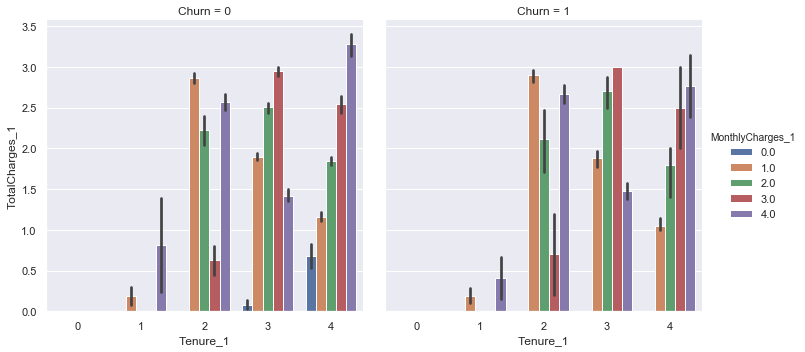

In [57]:
a = sns.catplot(x='Tenure_1', y='TotalCharges_1', hue='MonthlyCharges_1', col='Churn', data=data, kind='bar')

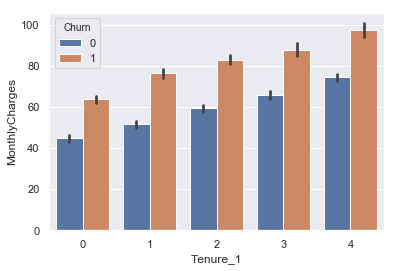

In [58]:
g = sns.barplot(x= "Tenure_1" , y= "MonthlyCharges" , hue="Churn" , data=data)

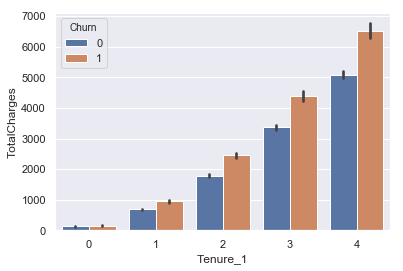

In [59]:
g = sns.barplot(x= "Tenure_1" , y= "TotalCharges" , hue="Churn" , data=data)

In [60]:
# Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
pd.crosstab(index=[data["Churn"], data["SeniorCitizen"]], columns=data["Gender"])

Gender               Female  Male
Churn SeniorCitizen              
0     0                2221  2287
      1                 328   338
1     0                 699   694
      1                 240   236

In [61]:
#Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb
#pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.
pd.crosstab(index=[data["InternetService"], data["PhoneService"]], columns="StreamingMovies")

col_0                         StreamingMovies
InternetService PhoneService                 
DSL             No                        682
                Yes                      1739
Fiber optic     Yes                      3096
No              Yes                      1526

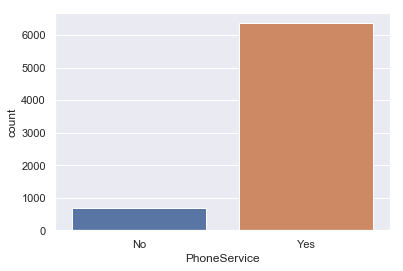

In [62]:
g = sns.countplot(x="PhoneService", data=data)

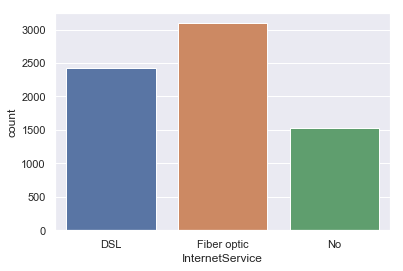

In [63]:
g = sns.countplot(x="InternetService", data=data)

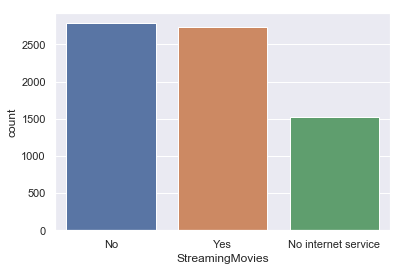

In [64]:
g = sns.countplot(x="StreamingMovies", data=data)

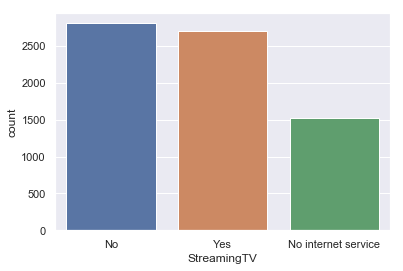

In [65]:
g = sns.countplot(x="StreamingTV", data=data)

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [66]:
# Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
data.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
MonthlyCharges_1    26
TotalCharges_1      11
Tenure_1             0
dtype: int64

In [67]:
MonthlyCharges_mean = data["MonthlyCharges"].mean()
MonthlyCharges_med = data["MonthlyCharges"].median()
print("MonthlyCharges mean: {0:.4f}, med: {1:.4f}".format(MonthlyCharges_mean, MonthlyCharges_med))

MonthlyCharges mean: 64.7075, med: 70.3000


In [68]:
pd.pivot_table(data, index="Tenure_1", values=["MonthlyCharges", "TotalCharges"], aggfunc=["median", "mean", "min", "max"], margins=True)

median                        mean               \
         MonthlyCharges TotalCharges MonthlyCharges TotalCharges   
Tenure_1                                                           
0                54.700       88.925      54.718077   143.637347   
1                65.450      690.500      59.782158   769.433465   
2                70.550     1970.825      64.630654  1939.030114   
3                75.475     3804.325      69.223214  3519.086222   
4                84.700     5757.200      75.878500  5180.669829   
All              70.350     1396.125      64.744048  2281.148744   

                    min                         max               
         MonthlyCharges TotalCharges MonthlyCharges TotalCharges  
Tenure_1                                                          
0                 18.75        18.80         109.90       669.45  
1                 18.80        96.80         112.95      2239.65  
2                 18.25       350.10         116.25      4469.10  
3                 18.40       761.85         117.45      7049.50  
4                 19.10      1123.65         118.75      8684.80  
All               18.25        18.80         118.75      8684.80

In [69]:
data["MonthlyCharges"].fillna(MonthlyCharges_mean, inplace=True)
data["MonthlyCharges"].isna().sum()

0

In [70]:
# Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
data.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
MonthlyCharges_1    26
TotalCharges_1      11
Tenure_1             0
dtype: int64

In [87]:
#TotalCharges_mean = data["TotalCharges"].mean()
#TotalCharges_med = data["TotalCharges"].median()
#print("TotalCharges mean: {0:.4f}, med: {1:.4f}".format(TotalCharges_mean, TotalCharges_med))

TotalCharges mean: 2283.3004, med: 1397.4750


In [ ]:
#pd.pivot_table(data, index="Tenure_1", values=["MonthlyCharges", "TotalCharges"], aggfunc=["median", "mean", "min", "max"], margins=True)

In [71]:
l = data.eval("MonthlyCharges * Tenure")
l = l.median()
data["TotalCharges"].fillna(l, inplace=True)

In [72]:
data["TotalCharges"].isna().sum()

0

In [73]:
# Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.
pd.crosstab(index=[data["Dependents"], data["Partner"]], columns=data["Gender"])

Gender              Female  Male
Dependents Partner              
No         No         1646  1624
           Yes         804   847
Yes        No          144   214
           Yes         880   864

In [74]:
naDependents = data.query("Dependents not in ['Yes','No']")
naDependents.head(30)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_1,TotalCharges_1,Tenure_1
5,Female,0,No,NaN,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,4.0,0.0,1
27,Male,0,Yes,NaN,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,No,Electronic check,30.20,30.20,1,0.0,0.0,0
41,Female,0,Yes,NaN,70,Yes,Yes,DSL,Yes,Yes,...,No,Two year,Yes,Credit card (automatic),69.20,4872.35,0,2.0,2.0,4
42,Female,0,Yes,NaN,17,Yes,No,No,No internet service,No internet service,...,No internet service,One year,No,Mailed check,20.75,418.25,0,0.0,0.0,1
44,Female,0,Yes,NaN,13,Yes,Yes,DSL,Yes,Yes,...,No,Month-to-month,Yes,Electronic check,76.20,981.45,0,2.0,0.0,1
64,Female,0,No,NaN,9,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,No,Electronic check,94.40,857.25,1,1.0,0.0,1
65,Female,0,No,NaN,3,Yes,No,DSL,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,75.30,244.10,0,2.0,0.0,0
71,Female,0,Yes,NaN,52,Yes,No,No,No internet service,No internet service,...,No internet service,One year,Yes,Electronic check,20.40,1090.65,0,0.0,0.0,3
97,Male,0,No,NaN,5,Yes,No,No,No internet service,No internet service,...,No internet service,Month-to-month,No,Mailed check,21.05,113.85,1,0.0,0.0,0
104,Male,0,Yes,NaN,68,Yes,Yes,Fiber optic,No,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,1,4.0,4.0,4


In [75]:
data["Dependents"].value_counts()

No     4921
Yes    2102
Name: Dependents, dtype: int64

In [76]:
data["Dependents"].fillna("Nie", inplace=True)

In [77]:
data["Dependents"].isna().sum()

0

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [78]:
# Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
#a = data.eval("TotalCharges / Tenure")
#a = a.median()
#data['MonthlyCharges'].fillna(a, inplace=True)
data["TotalMonthCharges"] = data.eval("MonthlyCharges * Tenure")

In [79]:
# Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.
def map_TotalMonthCharges(TotalMonthCharges):
    if {"TotalMonthCharges" < "TotalCharges"}:
        return "-1"
    elif {"TotalMonthCharges" == "TotalCharges"}:
        return "0"
    elif {"TotalMonthCharges" > "TotalCharges"}:
        return "+1"
    return TotalMonthCharges;

data["TotalRatio"] = data["TotalMonthCharges"].apply(map_TotalMonthCharges)
data["TotalRatio"].value_counts()  

-1    7043
Name: TotalRatio, dtype: int64

In [80]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_1,TotalCharges_1,Tenure_1,TotalMonthCharges,TotalRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,0.0,0.0,0,29.85,-1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,3.0,3.0,2,1936.30,-1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,1,3.0,0.0,0,107.70,-1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,0,3.0,3.0,3,1903.50,-1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,1,2.0,0.0,0,141.40,-1


### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [81]:
# Použite vhodný spôsob transformovania kategorických atribútov
from sklearn.preprocessing import LabelEncoder

data['Gender'] = LabelEncoder().fit_transform(data['Gender']) 
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])
data['PhoneService'] = LabelEncoder().fit_transform(data['PhoneService'])
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])
data['SeniorCitizen'] = LabelEncoder().fit_transform(data['SeniorCitizen'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_1,TotalCharges_1,Tenure_1,TotalMonthCharges,TotalRatio
0,0,0,1,1,1,0,No phone service,DSL,No,Yes,...,1,Electronic check,29.85,29.85,0,0.0,0.0,0,29.85,-1
1,1,0,0,1,34,1,No,DSL,Yes,No,...,0,Mailed check,56.95,1889.50,0,3.0,3.0,2,1936.30,-1
2,1,0,0,1,2,1,No,DSL,Yes,Yes,...,1,Mailed check,53.85,108.15,1,3.0,0.0,0,107.70,-1
3,1,0,0,1,45,0,No phone service,DSL,Yes,No,...,0,Bank transfer (automatic),42.30,1840.75,0,3.0,3.0,3,1903.50,-1
4,0,0,0,1,2,1,No,Fiber optic,No,No,...,1,Electronic check,70.70,151.65,1,2.0,0.0,0,141.40,-1


In [82]:
data = pd.get_dummies(data, columns=['OnlineSecurity', 'OnlineBackup', 'MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'InternetService', 'Contract', 'PaymentMethod'])
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,1,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


In [83]:
data['MonthlyCharges_1'] = data['MonthlyCharges_1'].map({'less_1':0, 'more_1':1, 'avg_avg_MCH':2, 'much_1':3, 'more than much_1':4})
data['Tenure_1'] = data['Tenure_1'].map({'short':0 , 'short1':1, 'avg':2, 'long':3, 'long1':4}) 
data['TotalCharges_1'] = data['TotalCharges_1'].map({'less':0 , 'more':1, 'avg_avg_TCH':2, 'much':3, 'more than much':4}) 
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,1,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


In [84]:
data = data.drop(columns=['Tenure_1', 'MonthlyCharges_1','TotalCharges_1'])
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,1,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


In [85]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 
data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
data.head()

C:\Users\Lucia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.5,0.013889,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.5,0.472222,1.0,0.0,0.385075,0.215867,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.5,0.027778,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.5,0.625000,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.5,0.027778,1.0,1.0,0.521891,0.015330,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [86]:
X_data = data.drop('Churn', axis=1) 
y_data = data['Churn'] 

print(X_data.shape) 
print(y_data.shape)

(7043, 42)
(7043,)


In [87]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [88]:
#from sklearn.preprocessing import MinMaxScaler 

#scaler = MinMaxScaler() 
#data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
#data.head() 
data.isna().sum()

Gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
Tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
TotalMonthCharges                          0
TotalRatio                                 0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
DeviceProtection_No                        0
DeviceProt

In [89]:
from sklearn.neighbors import KNeighborsClassifier # Importovanie triedy zodpovedajúcej modelu, ktorý budeme trénovať


model = KNeighborsClassifier(15)                   
model.fit(X_train, y_train)                          
y_model = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_model)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_model)}")

Presnosť (accuracy) modelu: 0.7846663511594889
Presnosť (precision) modelu: 0.566003616636528
Návratnosť (recall) modelu: 0.5928030303030303


In [90]:
# kNN
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

In [90]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 50))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [91]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [92]:
# grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy') 
# grid.fit(X_train, y_train)
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy') # nastavíme parametre Grid Searchu
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
print("Najlepšie parametre sú:")
print()
print(grid.best_params_)
print()
print(grid.best_score_)

Najlepšie parametre sú:

{'n_neighbors': 30}

0.7845841784989858


In [94]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_n_neighbors',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [95]:
print(grid.cv_results_["mean_test_score"][24])

0.7780933062880324


In [96]:
print("Jednotlivé skóre pre jednotlivé hodnoty parametra k:")
print()
means = grid.cv_results_['mean_test_score'] 
stds = grid.cv_results_['std_test_score'] 
params = grid.cv_results_['params']

for mean, std, params in zip(means, stds, params): 
    print("%0.3f (+/-%0.03f) pre hodnotu %s" % (mean, std, params)) 
print()

Jednotlivé skóre pre jednotlivé hodnoty parametra k:

0.712 (+/-0.005) pre hodnotu {'n_neighbors': 1}
0.751 (+/-0.008) pre hodnotu {'n_neighbors': 2}
0.742 (+/-0.006) pre hodnotu {'n_neighbors': 3}
0.754 (+/-0.009) pre hodnotu {'n_neighbors': 4}
0.755 (+/-0.012) pre hodnotu {'n_neighbors': 5}
0.762 (+/-0.010) pre hodnotu {'n_neighbors': 6}
0.763 (+/-0.010) pre hodnotu {'n_neighbors': 7}
0.767 (+/-0.007) pre hodnotu {'n_neighbors': 8}
0.769 (+/-0.011) pre hodnotu {'n_neighbors': 9}
0.775 (+/-0.009) pre hodnotu {'n_neighbors': 10}
0.773 (+/-0.013) pre hodnotu {'n_neighbors': 11}
0.775 (+/-0.010) pre hodnotu {'n_neighbors': 12}
0.774 (+/-0.013) pre hodnotu {'n_neighbors': 13}
0.778 (+/-0.013) pre hodnotu {'n_neighbors': 14}
0.780 (+/-0.014) pre hodnotu {'n_neighbors': 15}
0.780 (+/-0.015) pre hodnotu {'n_neighbors': 16}
0.778 (+/-0.017) pre hodnotu {'n_neighbors': 17}
0.780 (+/-0.015) pre hodnotu {'n_neighbors': 18}
0.776 (+/-0.012) pre hodnotu {'n_neighbors': 19}
0.778 (+/-0.012) pre hod

In [97]:
# krizova validacia

print('Parameter k pre model 0:')
print(grid.cv_results_["params"][0])


print()
print('CV skóre pre model 0:')
print(grid.cv_results_["split0_test_score"][0])
print(grid.cv_results_["split1_test_score"][0])
print(grid.cv_results_["split2_test_score"][0])
print(grid.cv_results_["split3_test_score"][0])
print(grid.cv_results_["split4_test_score"][0])

# Priemerné skóre modelu s indexom 0
print()
print('Priemerné skóre pre model 0')
print(grid.cv_results_["mean_test_score"][0])

Parameter k pre model 0:
{'n_neighbors': 1}

CV skóre pre model 0:
0.7082066869300911
0.7089249492900609
0.7119675456389453
0.7109533468559838
0.7218274111675127

Priemerné skóre pre model 0
0.7123732251521299


In [ ]:
# vizualizacia


In [94]:
# decision tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier()    
dt.fit(X_train, y_train)       
y_dt = dt.predict(X_test)      

from sklearn.metrics import accuracy_score,precision_score, recall_score 

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_dt)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_dt)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_dt)}")

cm = confusion_matrix(y_test, y_dt) 
print(cm)

Presnosť (accuracy) modelu: 0.7397065783246569
Presnosť (precision) modelu: 0.4814189189189189
Návratnosť (recall) modelu: 0.5397727272727273
[[1278  307]
 [ 243  285]]


In [98]:
# random forest 1
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=500, max_depth=3)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Presnosť (accuracy) modelu: 0.8050165641268339
[[1505   80]
 [ 332  196]]


In [99]:
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.1782538883874424, 'Contract_Month-to-month'),
 (0.1123268560123808, 'Tenure'),
 (0.09493181466136283, 'OnlineSecurity_No'),
 (0.08585958495600046, 'TechSupport_No'),
 (0.06692488786479178, 'InternetService_Fiber optic'),
 (0.06112349143407088, 'PaymentMethod_Electronic check'),
 (0.060851245538976216, 'Contract_Two year'),
 (0.05752887132888235, 'TotalMonthCharges'),
 (0.05547649432550748, 'TotalCharges'),
 (0.026812893110124646, 'OnlineBackup_No'),
 (0.023478325445327127, 'MonthlyCharges'),
 (0.0186544619910469, 'Contract_One year'),
 (0.017756951893407653, 'DeviceProtection_No'),
 (0.01572054908638521, 'InternetService_DSL'),
 (0.015293588821061467, 'DeviceProtection_No internet service'),
 (0.013981742081485, 'OnlineSecurity_Yes'),
 (0.012549151450269441, 'OnlineBackup_No internet service'),
 (0.012140179949333934, 'InternetService_No'),
 (0.011842623989018577, 'OnlineSecurity_No internet service'),
 (0.011428011910136744, 'StreamingTV_No internet service'),
 (0.0102137947142467

In [100]:
# random forest 2
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

rf = RandomForestClassifier(n_estimators=1000, max_depth=4)
rf.fit(X_train, y_train) # natrenujeme model na trenovacej mnozine

y_rf = rf.predict(X_test) # vypocitame predikcie testovacich dat

# vypocitame a vypiseme metriky accuracy, precision, recall a F1, na zaver aj confusion matrix
print("Accuracy: %0.3f" % accuracy_score(y_test, y_rf))
print("Precision: %0.3f" % precision_score(y_test, y_rf))
print("Recall: %0.3f" % recall_score(y_test, y_rf))
print("F1: %0.3f" % f1_score(y_test, y_rf))
print()
cm = confusion_matrix(y_test, y_rf)
print(cm)

Accuracy: 0.804
Precision: 0.660
Recall: 0.441
F1: 0.529

[[1465  120]
 [ 295  233]]


### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [289]:
# from sklearn.metrics import roc_curve,auc

In [290]:
# fpr, tpr, thresholds = roc_curve(y_test, y_model, pos_label=1)

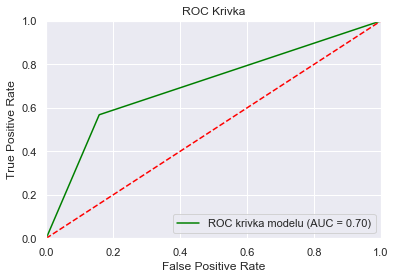

In [291]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_model, pos_label=1) 
roc_auc = auc(fpr, tpr) 
plt.title('ROC Krivka')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show() 

BestModel = KNeighborsClassifier(15)                    # Natrénovanie modelu kNN  
BestModel.fit(X_train, y_train)                         # Trénovanie modelu na trénovacej množine 
y_BestModel = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) BestModelu: {accuracy_score(y_test, y_BestModel)}")
#print(f"Presnosť (precision) BestModelu: {precision_score(y_test, y_BestModel)}")
#(f"Návratnosť (recall) BestModelu: {recall_score(y_test, y_BestModel)}")

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [101]:
BestModel = KNeighborsClassifier(15)                       
BestModel.fit(X_train, y_train)                        
y_BestModel = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) BestModelu: {accuracy_score(y_test, y_BestModel)}")
print(f"Presnosť (precision) BestModelu: {precision_score(y_test, y_BestModel)}")
print(f"Návratnosť (recall) BestModelu: {recall_score(y_test, y_BestModel)}")

Presnosť (accuracy) BestModelu: 0.7846663511594889
Presnosť (precision) BestModelu: 0.566003616636528
Návratnosť (recall) BestModelu: 0.5928030303030303


In [102]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_BestModel)
print(cm)

[[1345  240]
 [ 215  313]]


In [103]:
from sklearn.preprocessing import LabelEncoder

data_dt = pd.read_csv("../data/Telecom-Churn.csv")
data_dt = data_dt.drop(columns=["Unnamed: 0", "CustomerID"])

x = data_dt.eval("TotalCharges / Tenure")
data_dt["MonthlyCharges"].fillna(x, inplace=True) 
data_dt["MonthlyCharges"].isna().sum()

y = data_dt.eval("MonthlyCharges * Tenure")
data_dt["TotalCharges"].fillna(y, inplace=True) 
data_dt["TotalCharges"].isna().sum()

data_dt["Dependents"].fillna("No", inplace=True)

data_dt["Gender"] = LabelEncoder().fit_transform(data_dt["Gender"])
data_dt["Partner"] = data_dt["Partner"].map({"No": 0, "Yes": 1})
data_dt["Dependents"] = data_dt["Dependents"].map({"No": 0, "Yes": 1})
data_dt["PhoneService"] = data_dt["PhoneService"].map({"No": 0, "Yes": 1})
data_dt["MultipleLines"] = data_dt["MultipleLines"].map({"No phone service": 0, "No": 1, "Yes": 2})
data_dt["OnlineSecurity"] = data_dt["OnlineSecurity"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["OnlineBackup"] = data_dt["OnlineBackup"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["DeviceProtection"] = data_dt["DeviceProtection"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["TechSupport"] = data_dt["TechSupport"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["StreamingTV"] = data_dt["StreamingTV"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["StreamingMovies"] = data_dt["StreamingMovies"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["Contract"] = data_dt["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
data_dt["PaperlessBilling"] = data_dt["PaperlessBilling"].map({"No": 0, "Yes": 1})
data_dt["Churn"] = data_dt["Churn"].map({"No": 0, "Yes": 1})
data_dt = pd.get_dummies(data_dt, columns=["InternetService", "PaymentMethod"])
data_dt.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,2,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,2,1,2,...,56.95,1889.50,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,1,2,2,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,2,1,2,...,42.30,1840.75,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,1,1,1,1,...,70.70,151.65,1,0,1,0,0,0,1,0


In [104]:
X_data_dt = data_dt.drop(columns=["Churn"], axis=1) 
y_data_dt = data_dt["Churn"] 

print(X_data_dt.shape) 
print(y_data_dt.shape)

(7043, 24)
(7043,)


In [105]:
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_data_dt, y_data_dt, test_size=0.3, random_state=1)

In [106]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=3)    
dt.fit(X_train_dt, y_train_dt)         
y_dt = dt.predict(X_test_dt)       

from sklearn.metrics import accuracy_score,precision_score, recall_score 

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test_dt, y_dt)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test_dt, y_dt)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test_dt, y_dt)}")

cm = confusion_matrix(y_test_dt, y_dt)  
print(cm)

Presnosť (accuracy) modelu: 0.7979176526265973
Presnosť (precision) modelu: 0.6534954407294833
Návratnosť (recall) modelu: 0.4071969696969697
[[1471  114]
 [ 313  215]]


In [107]:
from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_data_dt.columns.values, class_names=['0','1'], out_file=f)